In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys
from datetime import date
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pd.set_option("display.max_rows", 100, "display.max_columns", 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

def p(s):
    print(s)
    
pd.DataFrame.len = pd.Index.len = lambda x: print(len(x))

In [8]:
# Partition training, dev, and test data
seasonHist = pd.read_csv('seasonHist.csv')
X = seasonHist \
    .loc[:,seasonHist.columns.str.contains('-\d+') | seasonHist.columns.str.match('fanPts')] \
    .drop('fanPts',axis=1) \
    .fillna(0)
y = seasonHist.fanPts

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.3, random_state=0)
X_dev_raw, X_test_raw, y_dev_raw, y_test_raw = train_test_split(X_test_raw, y_test_raw, test_size=0.5, random_state=0)

# Manually downselect useful columns
keepCols = \
    X.columns.str.contains('fanPts') | \
    X.columns.str.contains('^complete_pass') | \
    X.columns.str.contains('rush_attempt') | \
    X.columns.str.contains('yards_gained') | \
    X.columns.str.contains('^touchdown')

X_train_select, X_test_select, y_train_select, y_test_select = train_test_split(X.loc[:,keepCols], y, test_size=0.3, random_state=0)
X_dev_select, X_test_select, y_dev_select, y_test_select = train_test_split(X_test_select, y_test_select, test_size=0.5, random_state=0)

### K Neighbors Regression

#### Base model

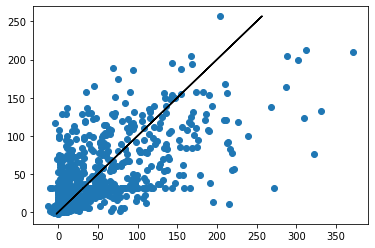

MAE: 32.4
RMSE: 45.9
R^2: 0.39


In [12]:
X_train, X_dev, y_train, y_dev = X_train_raw, X_dev_raw, y_train_raw, y_dev_raw

m = neighbors.KNeighborsRegressor()
m.fit(X_train,y_train)
y_pred = m.predict(X_dev)

plt.scatter(y_dev, y_pred)
plt.plot(y_pred,y_pred,color='black')
plt.show()

mae = mean_absolute_error(y_dev, y_pred).round(1)
rmse = mean_squared_error(y_dev, y_pred, squared=False).round(1)
r2 = r2_score(y_dev, y_pred).round(2)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

#### GridSearchCV

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   20.0s finished


{'metric': 'euclidean', 'n_neighbors': 38, 'weights': 'distance'}


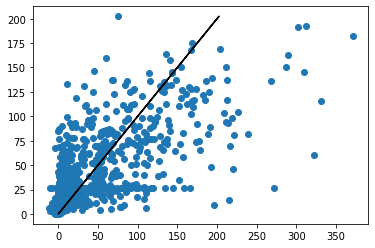

MAE: 30.0
RMSE: 43.8
R^2: 0.44


,param_weights,param_metric,param_n_neighbors,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time,std_fit_time,std_score_time
12,distance,euclidean,35,0.450,0.012,11,0.195,0.849,0.015,0.111
14,distance,euclidean,36,0.450,0.011,12,0.233,0.900,0.070,0.134
16,distance,euclidean,37,0.450,0.011,10,0.235,0.975,0.020,0.189
18,distance,euclidean,38,0.454,0.011,1,0.226,0.821,0.017,0.189
20,distance,euclidean,39,0.453,0.011,2,0.274,1.110,0.044,0.126
22,distance,euclidean,40,0.453,0.011,3,0.291,0.973,0.047,0.175
0,distance,manhattan,35,0.448,0.013,18,0.191,1.103,0.012,0.063
2,distance,manhattan,36,0.448,0.013,21,0.199,1.166,0.024,0.101
4,distance,manhattan,37,0.449,0.012,13,0.224,1.152,0.010,0.133
6,distance,manhattan,38,0.451,0.011,6,0.191,1.058,0.010,0.107


In [14]:
X_train, X_dev, y_train, y_dev = X_train_raw, X_dev_raw, y_train_raw, y_dev_raw

grid = GridSearchCV(
    neighbors.KNeighborsRegressor(),
    {
        'n_neighbors':[x for x in range(35,41)],
        'weights':['distance','uniform'],
        'metric':['manhattan','euclidean']
    },
    n_jobs = -1,
    verbose = 7,
    cv = 5
).fit(X_train,y_train)

print(grid.best_params_)

m = neighbors.KNeighborsRegressor(**grid.best_params_)
m.fit(X_train,y_train)
y_pred = m.predict(X_dev)

plt.scatter(y_dev, y_pred)
plt.plot(y_pred,y_pred,color='black')
plt.show()

mae = mean_absolute_error(y_dev, y_pred).round(1)
rmse = mean_squared_error(y_dev, y_pred, squared=False).round(1)
r2 = r2_score(y_dev, y_pred).round(2)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

params = ['param_weights','param_metric','param_n_neighbors']
pd.DataFrame(grid.cv_results_)[params+['mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time','std_fit_time','std_score_time']].sort_values(params)

#### GridSearchCV, hand-selected features

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    2.9s finished


{'metric': 'euclidean', 'n_neighbors': 54, 'weights': 'distance'}


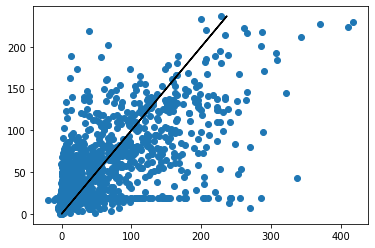

MAE: 30.4
RMSE: 47.0
R^2: 0.46


,param_weights,param_metric,param_n_neighbors,mean_test_score,std_test_score,rank_test_score,mean_fit_time,mean_score_time,std_fit_time,std_score_time
13,distance,euclidean,54,0.469,0.018,1,0.067,0.103,0.006,0.010
19,distance,euclidean,66,0.469,0.017,2,0.066,0.122,0.010,0.012
17,distance,euclidean,62,0.469,0.017,3,0.056,0.112,0.007,0.009
14,distance,euclidean,56,0.468,0.018,4,0.054,0.118,0.008,0.007
18,distance,euclidean,64,0.468,0.017,5,0.055,0.114,0.009,0.011
21,distance,euclidean,70,0.468,0.017,6,0.065,0.105,0.007,0.014
8,distance,manhattan,66,0.468,0.016,7,0.062,0.130,0.007,0.006
20,distance,euclidean,68,0.468,0.017,8,0.063,0.125,0.011,0.002
7,distance,manhattan,64,0.468,0.016,9,0.062,0.148,0.006,0.010
16,distance,euclidean,60,0.468,0.017,10,0.075,0.108,0.011,0.011


In [13]:
X_train, X_dev, y_train, y_dev = X_train_select, X_dev_select, y_train_select, y_dev_select

grid = GridSearchCV(
    neighbors.KNeighborsRegressor(),
    {
        'n_neighbors':[x for x in range(50,71,2)],
        'weights':['distance'],
        'metric':['manhattan','euclidean']
    },
    n_jobs = -1,
    verbose = 7,
    cv = 5
).fit(X_train,y_train)

print(grid.best_params_)

m = neighbors.KNeighborsRegressor(**grid.best_params_)
m.fit(X_train,y_train)
y_pred = m.predict(X_dev)

plt.scatter(y_dev, y_pred)
plt.plot(y_pred,y_pred,color='black')
plt.show()

mae = mean_absolute_error(y_dev, y_pred).round(1)
rmse = mean_squared_error(y_dev, y_pred, squared=False).round(1)
r2 = r2_score(y_dev, y_pred).round(2)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

params = ['param_weights','param_metric','param_n_neighbors']
pd.DataFrame(grid.cv_results_)[params+['mean_test_score','std_test_score','rank_test_score','mean_fit_time','mean_score_time','std_fit_time','std_score_time']].sort_values('rank_test_score')